<a href="https://colab.research.google.com/github/edefang/Eyong/blob/main/final201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

This dataset, titled "Time Wasters on Social Media", contains self-reported responses from individuals regarding their patterns of social media usage and its impact on their daily lives. The data captures key behavioral and demographic features such as:Time spent on social media platforms.Productivity loss,Level of self-control,Preferred platform,Perceived level of addiction
The purpose of this dataset is to explore how social media usage behaviors correlate with self-perceived addiction levels, and whether we can predict addiction categories using machine learning techniques such as decision trees.







## Quesion
Can we predict a user's category of social media usage behavior (Low, Moderate, High, Very High) based on their time spent, productivity impact, and self-control?

## Data loading



In [1]:
import pandas as pd

try:
    df = pd.read_csv('Time-Wasters on Social Media.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'Time-Wasters on Social Media.csv' not found.")
    df = None

,UserID,Age,Gender,Location,Income,Debt,Owns Property,Profession,Demographics,Platform,...,ProductivityLoss,Satisfaction,Watch Reason,DeviceType,OS,Watch Time,Self Control,Addiction Level,CurrentActivity,ConnectionType
0,1,56,Male,Pakistan,82812,True,True,Engineer,Rural,Instagram,...,3,7,Procrastination,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
1,2,46,Female,Mexico,27999,False,True,Artist,Urban,Instagram,...,5,5,Habit,Computer,Android,5:00 PM,7,3,At school,Wi-Fi
2,3,32,Female,United States,42436,False,True,Engineer,Rural,Facebook,...,6,4,Entertainment,Tablet,Android,2:00 PM,8,2,At home,Mobile Data
3,4,60,Male,Barzil,62963,True,False,Waiting staff,Rural,YouTube,...,3,7,Habit,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
4,5,25,Male,Pakistan,22096,False,True,Manager,Urban,TikTok,...,8,2,Boredom,Smartphone,iOS,8:00 AM,10,0,At home,Mobile Data


(1000, 31)



## The distribution of users in each category using a count plot.



<ipython-input-2-676a91d5aff7>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Addiction Category', data=df, palette='viridis')


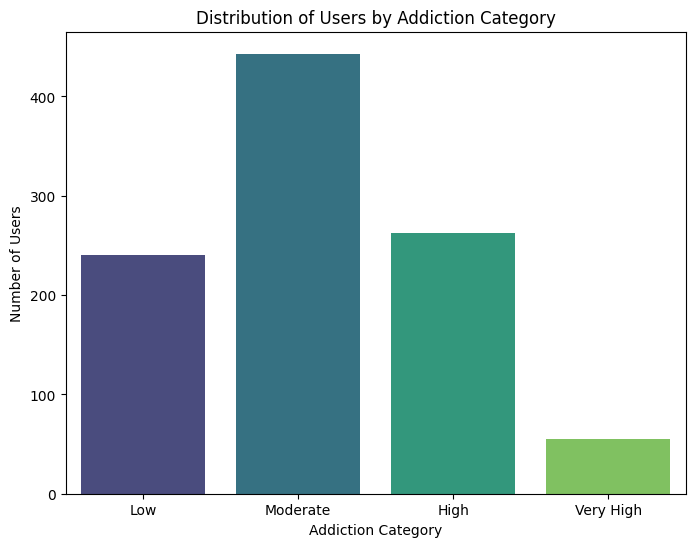

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the ranges for the addiction level categories
bins = [0, 2, 5, 7, float('inf')]
labels = ['Low', 'Moderate', 'High', 'Very High']

# Create the new target variable
df['Addiction Category'] = pd.cut(df['Addiction Level'], bins=bins, labels=labels, right=False)

# Visualize the distribution of users in each category using a countplot
plt.figure(figsize=(8, 6))
sns.countplot(x='Addiction Category', data=df, palette='viridis')
plt.title('Distribution of Users by Addiction Category')
plt.xlabel('Addiction Category')
plt.ylabel('Number of Users')
plt.show()

## Frequency Vs all Variables

Shape of the DataFrame: (1000, 33)

Data Types of Columns:
UserID                         int64
Age                            int64
Gender                        object
Location                      object
Income                         int64
Debt                            bool
Owns Property                   bool
Profession                    object
Demographics                  object
Platform                      object
Total Time Spent               int64
Number of Sessions             int64
Video ID                       int64
Video Category                object
Video Length                   int64
Engagement                     int64
Importance Score               int64
Time Spent On Video            int64
Number of Videos Watched       int64
Scroll Rate                    int64
Frequency                     object
ProductivityLoss               int64
Satisfaction                   int64
Watch Reason                  object
DeviceType                    object
OS              

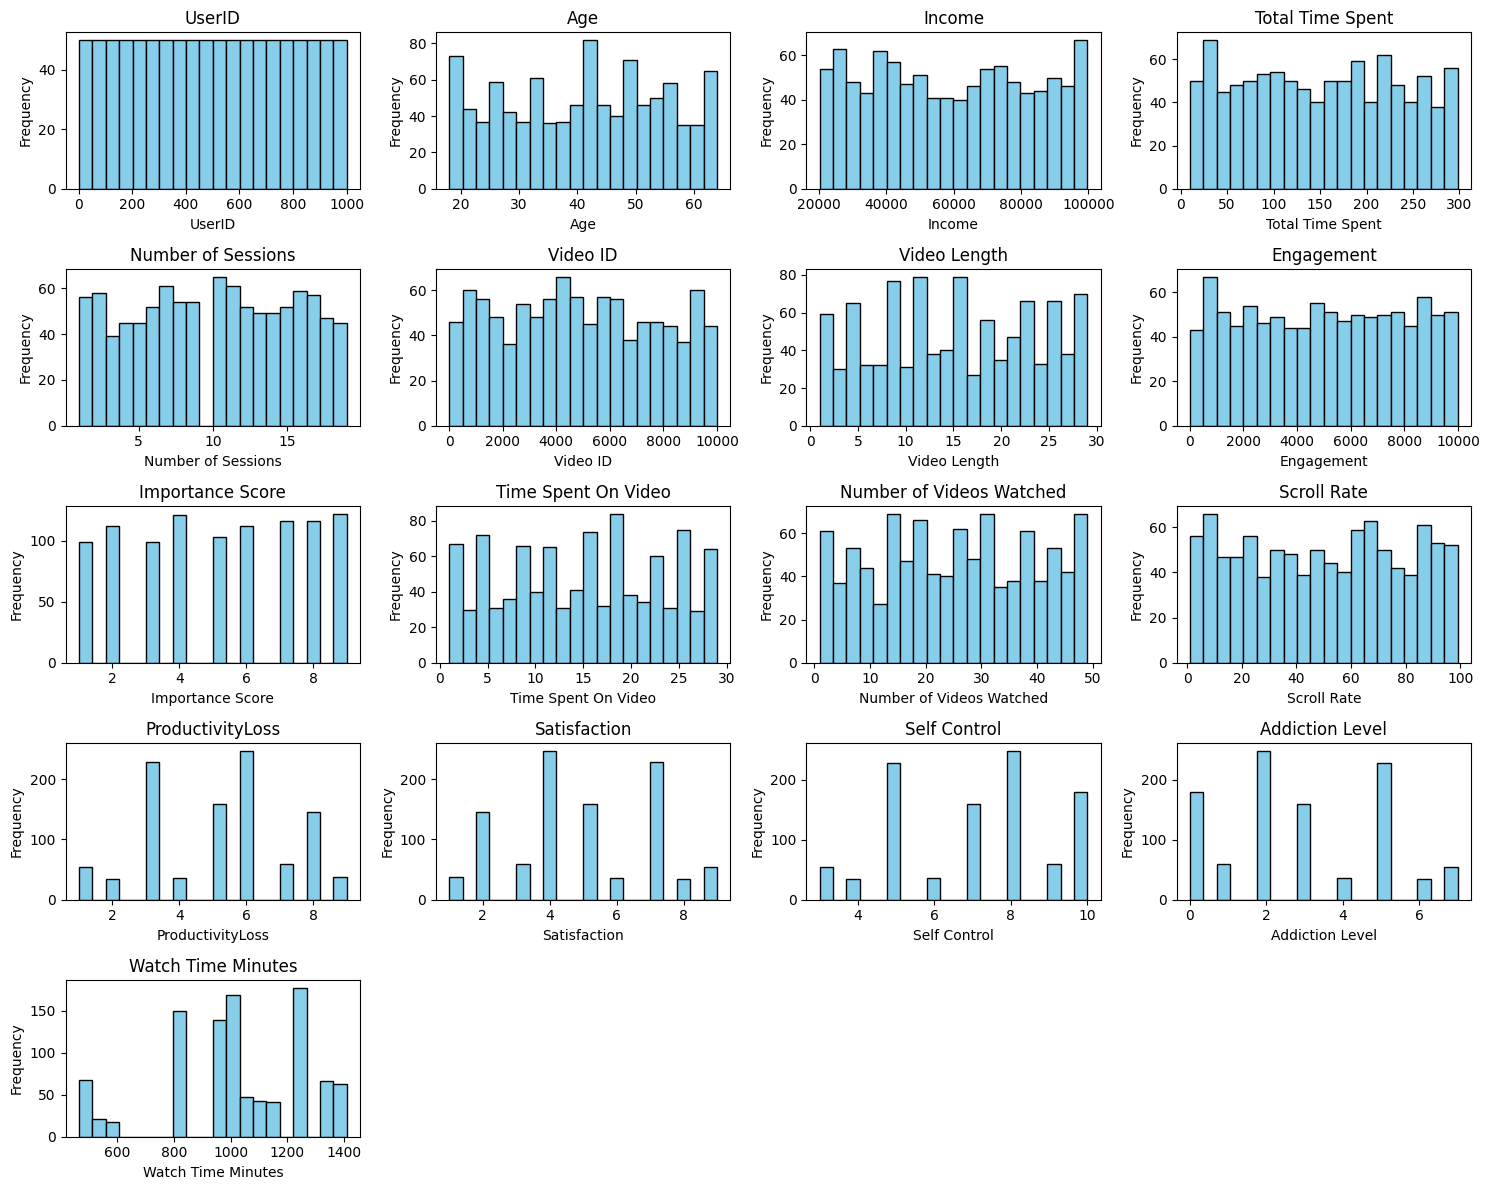

In [8]:
# Check the shape of the DataFramer
print("Shape of the DataFrame:", df.shape)

# Check data types of each column
print("\nData Types of Columns:")
print(df.dtypes)

# Get a concise summary of the DataFrame, including non-missing values
print("\nDataFrame Info:")
df.info()

# Analyze the distribution of the 'Addiction Level' column
print("\nDistribution of 'Addiction Level':")
print(df['Addiction Level'].value_counts())
print(df['Addiction Level'].describe())

# Descriptive statistics for numerical features and potential outlier detection
numerical_features = df.select_dtypes(include=['number'])
print("\nDescriptive Statistics for Numerical Features:")
print(numerical_features.describe())

# Visualize the distributions of numerical features
import matplotlib.pyplot as plt
# Adjust figure size for better readability. Increased the height slightly for more rows.
plt.figure(figsize=(15, 12))

# Adjust subplot grid to accommodate 17 features (e.g., 5 rows and 4 columns)
# This ensures there are enough slots for all numerical features (5 * 4 = 20)
for i, col in enumerate(numerical_features.columns):
    plt.subplot(5, 4, i + 1)
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout() # Adjust layout to prevent overlapping titles

plt.show()

## Data splitting



In [16]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df[['Watch Time Minutes', 'ProductivityLoss', 'Self Control']]
y = df['Addiction Category']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model training




In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize the decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the model (optional)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


## Model visualization



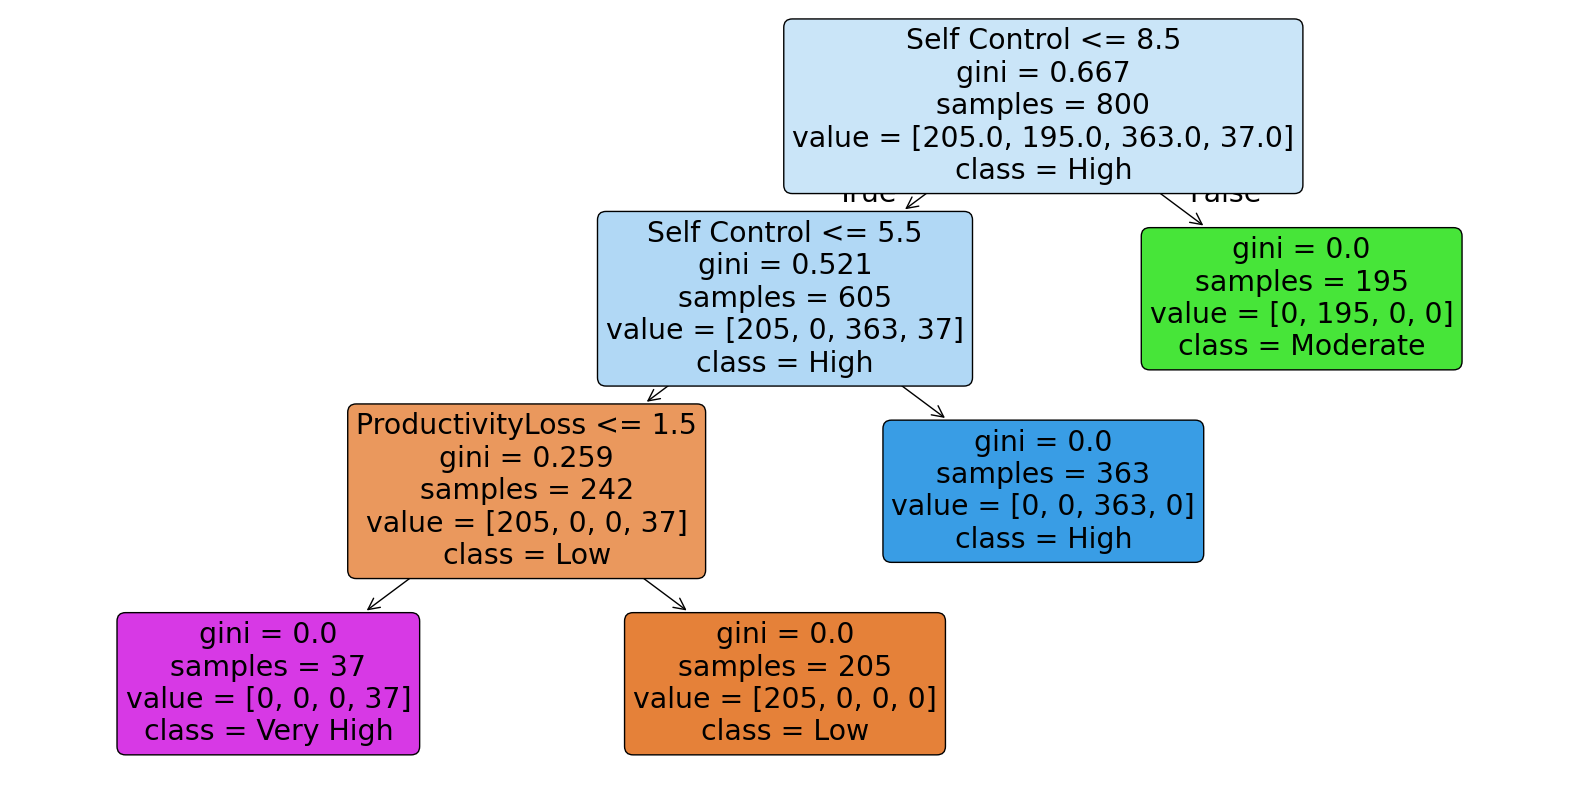

In [18]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, filled=True, feature_names=X_train.columns, class_names=y_train.cat.categories, rounded=True)
plt.show()